In [1]:
import os, glob, re, json
from datetime import date

In [24]:
day = date.today()
print (day)

2021-04-09


In [2]:
os.getcwd()

'C:\\Users\\ilosh\\Documents\\Python Scripts'

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import time
import matplotlib.pyplot as plt

In [3]:
opt = Options()
opt.add_argument('--headless')
opt.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36')

In [4]:
driver = webdriver.Chrome('chromedriver.exe', options=opt)
print (driver.execute_script('return navigator.userAgent'))

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36


In [5]:
url = r'https://www.dcard.tw/f/job'
driver.get(url)

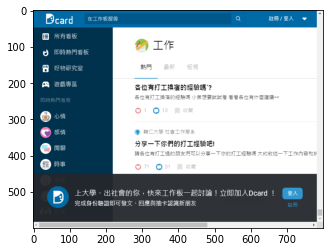

In [8]:
driver.save_screenshot('current_page.png')
img = plt.imread('current_page.png')
plt.imshow(img)

In [6]:
source = driver.page_source
soup = bs(source, 'lxml')
ind = soup.select('a.tgn9uw-3')
print (ind)

[<a class="tgn9uw-3 cUGTXH" href="/f/job/p/225578807"><span>&lt;請先點我&gt; 工作板＆實習、打工職缺刊登說明</span></a>, <a class="tgn9uw-3 cUGTXH" href="/f/job/p/235742147"><span>感覺快爆了QQ</span></a>, <a class="tgn9uw-3 cUGTXH" href="/f/job/p/235746627"><span>原來面試不用太老實報薪水？！查不到的~</span></a>, <a class="tgn9uw-3 cUGTXH" href="/f/job/p/235740502"><span>新人偷開我的電腦</span></a>, <a class="tgn9uw-3 cUGTXH" href="/f/job/p/235740568"><span>LinkedIn是什麼？LinkedIn懶人包整理（中）</span></a>]


In [14]:
for t in ind:
    with open('test.txt', 'a+', encoding='utf-8') as f:
        f.write(f"{t['href']},")

In [15]:
ind[0].text

'薪水小偷有錯嗎！？'

In [7]:
href_collect = []
loop_condition = True
run = 1
while loop_condition == True:
    if run == 1:
        source = driver.page_source
        soup = bs(source, 'lxml')
        target = soup.select('a.tgn9uw-3')
        for t in target:
            href = t['href']
            if href not in href_collect:
                href_collect.append(href)
        print (f'Run: {run}', f'{len(href_collect)}')
        run += 1
    elif run > 1:
        driver.execute_script('window.scrollBy(0, 1500);')
        time.sleep(2)
        source = driver.page_source
        soup = bs(source, 'lxml')
        target = soup.select('a.tgn9uw-3')
        last_count = len(href_collect)
        for t in target:
            href = t['href']
            if href not in href_collect:
                href_collect.append(href)
        new_count = len(href_collect)
        if new_count != last_count:
            print (f'Run: {run}', f'{len(href_collect)}')
            run += 1
        else:
            loop_condition = False
            
print (len(href_collect))

day = date.today()
with open(f'{day}_LinkCollection.txt', 'a+', encoding='utf-8') as f:
    for link in href_collect:
        f.write(f'{link},')

71901


In [125]:
ind[0]

<div data-index="34"><article class="tgn9uw-0 bReysV" data-post-list-viewed-cell-no="35" role="article"><div class="tgn9uw-1 ceKcvN"><div class="euk31c-0 epbkjc"><div class="euk31c-4 hBautw"><div class="yj50et-0 eOQgZp euk31c-5 etmCKd"><svg class="SVGIcon-sc-husrwi kFYvjM" focusable="false" height="16" viewbox="0 0 40 40" width="16"><title>女</title><path d="M40 20a20 20 0 11-40 0 20 20 0 0140 0" fill="#F48FB1"></path><path d="M28.7 17.5a9.6 9.6 0 00-1.4-4.4l.9-.6S25.5 6 17.9 7.3c-5.5 1-7.7 5.4-7.4 9C10.8 19.8 8.3 31 8.3 31l6.7 1.7a4.6 4.6 0 00-.7 1.1v.1a4.2 4.2 0 00-.4.8l-1.3 3.8a20 20 0 0010.6 1.1L23 37c.4-2-.4-4-2-5 0-1.1 0-3 .5-3.1 3-.6 5.1-2.5 6.2-5.3.3.2.6.2 1 .2a1.5 1.5 0 00-.2-3c.1-1 .2-2.2 0-3.3z" fill="#CB3A6B"></path></svg></div></div><div class="euk31c-1 ftveEB"><div class="euk31c-2 hkziuG"><div class="euk31c-3 iVGtVg">匿名</div></div></div></div></div><h2 class="tgn9uw-2 jWUdzO"><a class="tgn9uw-3 cUGTXH" href="/f/job/p/235709561"><span>已婚未育會很難找工作嗎？</span></a></h2><div class=

In [10]:
driver.execute_script('window.scrollBy(0, 1500);')

In [104]:
basic_url = r'https://www.dcard.tw'
dir_path = os.getcwd()
dir_path+='/corpus/'

for i in range(47636, 52636):
    href = href_collect[i]
    url = basic_url + href
    print (i, url)
    driver.get(url)
    time.sleep(2)
    try:
        #topic_ele = driver.find_element_by_xpath('//*[@id="__next"]/div[2]/div[2]/div/div/div/div/article/div[1]/div/h1')
        topic_ele = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, 
                                                                                   '//*[@id="__next"]/div[2]/div[2]/div/div/div/div/article/div[1]/div/h1')))
        source = driver.page_source
        soup = bs(source, 'lxml')
        #---抓取文章題目---#
        topic = soup.select('h1.sc-1932jlp-0.cqaWIE')
        topic_str = topic[0].text
        #---抓取文章發布時間---#
        issue_time = soup.select('div.sc-1eorkjw-3.lazWkr > div')
        time_str = issue_time[1].text.split(' ')[0]
        #---抓取內文---#
        content = soup.select('div.sc-1eorkjw-5.VIAMx > div > div.phqjxq-0.fQNVmg > span')
        content_str = content[0].text
        
        with open(dir_path + f'{i}_{time_str}.txt', 'w', encoding='utf-8') as f:
            f.write(content_str)
        
        print ('---文本寫入---')
    except:
        #raise
        ind = i
        print (f'{ind}: {href} - PageError')

47636 https://www.dcard.tw/f/job/p/229388142
---文本寫入---
47637 https://www.dcard.tw/f/job/p/229388113
---文本寫入---
47638 https://www.dcard.tw/f/job/p/229388061
---文本寫入---
47639 https://www.dcard.tw/f/job/p/229387988
---文本寫入---
47640 https://www.dcard.tw/f/job/p/229387987
---文本寫入---
47641 https://www.dcard.tw/f/job/p/229387931
---文本寫入---
47642 https://www.dcard.tw/f/job/p/229387885
---文本寫入---
47643 https://www.dcard.tw/f/job/p/229387804
---文本寫入---
47644 https://www.dcard.tw/f/job/p/229387787
---文本寫入---
47645 https://www.dcard.tw/f/job/p/229387708
---文本寫入---
47646 https://www.dcard.tw/f/job/p/229387607
---文本寫入---
47647 https://www.dcard.tw/f/job/p/229387415
---文本寫入---
47648 https://www.dcard.tw/f/job/p/229387344
---文本寫入---
47649 https://www.dcard.tw/f/job/p/229387165
---文本寫入---
47650 https://www.dcard.tw/f/job/p/229386986
---文本寫入---
47651 https://www.dcard.tw/f/job/p/229386749
---文本寫入---
47652 https://www.dcard.tw/f/job/p/229386717
---文本寫入---
47653 https://www.dcard.tw/f/job/p/229386598
---

---文本寫入---
47783 https://www.dcard.tw/f/job/p/229366414
---文本寫入---
47784 https://www.dcard.tw/f/job/p/229366081
---文本寫入---
47785 https://www.dcard.tw/f/job/p/229365975
---文本寫入---
47786 https://www.dcard.tw/f/job/p/229365967
---文本寫入---
47787 https://www.dcard.tw/f/job/p/229365749
---文本寫入---
47788 https://www.dcard.tw/f/job/p/229365384
---文本寫入---
47789 https://www.dcard.tw/f/job/p/229365377
---文本寫入---
47790 https://www.dcard.tw/f/job/p/229365250
---文本寫入---
47791 https://www.dcard.tw/f/job/p/229365111
---文本寫入---
47792 https://www.dcard.tw/f/job/p/229365096
---文本寫入---
47793 https://www.dcard.tw/f/job/p/229365028
---文本寫入---
47794 https://www.dcard.tw/f/job/p/229364937
---文本寫入---
47795 https://www.dcard.tw/f/job/p/229364875
---文本寫入---
47796 https://www.dcard.tw/f/job/p/229364730
---文本寫入---
47797 https://www.dcard.tw/f/job/p/229364651
---文本寫入---
47798 https://www.dcard.tw/f/job/p/229363595
---文本寫入---
47799 https://www.dcard.tw/f/job/p/229363340
---文本寫入---
47800 https://www.dcard.tw/f/job/p/22

---文本寫入---
47930 https://www.dcard.tw/f/job/p/229343409
---文本寫入---
47931 https://www.dcard.tw/f/job/p/229343382
---文本寫入---
47932 https://www.dcard.tw/f/job/p/229343330
---文本寫入---
47933 https://www.dcard.tw/f/job/p/229343283
---文本寫入---
47934 https://www.dcard.tw/f/job/p/229343219
---文本寫入---
47935 https://www.dcard.tw/f/job/p/229342940
---文本寫入---
47936 https://www.dcard.tw/f/job/p/229342703
---文本寫入---
47937 https://www.dcard.tw/f/job/p/229342361
---文本寫入---
47938 https://www.dcard.tw/f/job/p/229341945
---文本寫入---
47939 https://www.dcard.tw/f/job/p/229341884
---文本寫入---
47940 https://www.dcard.tw/f/job/p/229341460
---文本寫入---
47941 https://www.dcard.tw/f/job/p/229341383
---文本寫入---
47942 https://www.dcard.tw/f/job/p/229341138
---文本寫入---
47943 https://www.dcard.tw/f/job/p/229341076
---文本寫入---
47944 https://www.dcard.tw/f/job/p/229341013
---文本寫入---
47945 https://www.dcard.tw/f/job/p/229340868
---文本寫入---
47946 https://www.dcard.tw/f/job/p/229340548
---文本寫入---
47947 https://www.dcard.tw/f/job/p/22

---文本寫入---
48077 https://www.dcard.tw/f/job/p/229317698
---文本寫入---
48078 https://www.dcard.tw/f/job/p/229317654
---文本寫入---
48079 https://www.dcard.tw/f/job/p/229317626
---文本寫入---
48080 https://www.dcard.tw/f/job/p/229317562
---文本寫入---
48081 https://www.dcard.tw/f/job/p/229317297
---文本寫入---
48082 https://www.dcard.tw/f/job/p/229317061
---文本寫入---
48083 https://www.dcard.tw/f/job/p/229316670
---文本寫入---
48084 https://www.dcard.tw/f/job/p/229316497
---文本寫入---
48085 https://www.dcard.tw/f/job/p/229316372
---文本寫入---
48086 https://www.dcard.tw/f/job/p/229316285
---文本寫入---
48087 https://www.dcard.tw/f/job/p/229316042
---文本寫入---
48088 https://www.dcard.tw/f/job/p/229316023
---文本寫入---
48089 https://www.dcard.tw/f/job/p/229315863
---文本寫入---
48090 https://www.dcard.tw/f/job/p/229315737
---文本寫入---
48091 https://www.dcard.tw/f/job/p/229315724
---文本寫入---
48092 https://www.dcard.tw/f/job/p/229315709
---文本寫入---
48093 https://www.dcard.tw/f/job/p/229315581
---文本寫入---
48094 https://www.dcard.tw/f/job/p/22

---文本寫入---
48224 https://www.dcard.tw/f/job/p/229292745
---文本寫入---
48225 https://www.dcard.tw/f/job/p/229292641
---文本寫入---
48226 https://www.dcard.tw/f/job/p/229292353
---文本寫入---
48227 https://www.dcard.tw/f/job/p/229292182
---文本寫入---
48228 https://www.dcard.tw/f/job/p/229291887
---文本寫入---
48229 https://www.dcard.tw/f/job/p/229291813
---文本寫入---
48230 https://www.dcard.tw/f/job/p/229291714
---文本寫入---
48231 https://www.dcard.tw/f/job/p/229291509
---文本寫入---
48232 https://www.dcard.tw/f/job/p/229291339
---文本寫入---
48233 https://www.dcard.tw/f/job/p/229291117
---文本寫入---
48234 https://www.dcard.tw/f/job/p/229291039
---文本寫入---
48235 https://www.dcard.tw/f/job/p/229290850
---文本寫入---
48236 https://www.dcard.tw/f/job/p/229290750
---文本寫入---
48237 https://www.dcard.tw/f/job/p/229290493
---文本寫入---
48238 https://www.dcard.tw/f/job/p/229290320
---文本寫入---
48239 https://www.dcard.tw/f/job/p/229289929
---文本寫入---
48240 https://www.dcard.tw/f/job/p/229289443
---文本寫入---
48241 https://www.dcard.tw/f/job/p/22

---文本寫入---
48371 https://www.dcard.tw/f/job/p/229270061
---文本寫入---
48372 https://www.dcard.tw/f/job/p/229270004
---文本寫入---
48373 https://www.dcard.tw/f/job/p/229269824
---文本寫入---
48374 https://www.dcard.tw/f/job/p/229269606
---文本寫入---
48375 https://www.dcard.tw/f/job/p/229269588
---文本寫入---
48376 https://www.dcard.tw/f/job/p/229269304
---文本寫入---
48377 https://www.dcard.tw/f/job/p/229269283
---文本寫入---
48378 https://www.dcard.tw/f/job/p/229269066
---文本寫入---
48379 https://www.dcard.tw/f/job/p/229269012
---文本寫入---
48380 https://www.dcard.tw/f/job/p/229268814
---文本寫入---
48381 https://www.dcard.tw/f/job/p/229268506
---文本寫入---
48382 https://www.dcard.tw/f/job/p/229268465
---文本寫入---
48383 https://www.dcard.tw/f/job/p/229268082
---文本寫入---
48384 https://www.dcard.tw/f/job/p/229268049
---文本寫入---
48385 https://www.dcard.tw/f/job/p/229268020
---文本寫入---
48386 https://www.dcard.tw/f/job/p/229267965
---文本寫入---
48387 https://www.dcard.tw/f/job/p/229267803
---文本寫入---
48388 https://www.dcard.tw/f/job/p/22

---文本寫入---
48518 https://www.dcard.tw/f/job/p/229242271
---文本寫入---
48519 https://www.dcard.tw/f/job/p/229242245
---文本寫入---
48520 https://www.dcard.tw/f/job/p/229241882
---文本寫入---
48521 https://www.dcard.tw/f/job/p/229241418
---文本寫入---
48522 https://www.dcard.tw/f/job/p/229241338
---文本寫入---
48523 https://www.dcard.tw/f/job/p/229241221
---文本寫入---
48524 https://www.dcard.tw/f/job/p/229241208
---文本寫入---
48525 https://www.dcard.tw/f/job/p/229241200
---文本寫入---
48526 https://www.dcard.tw/f/job/p/229240711
---文本寫入---
48527 https://www.dcard.tw/f/job/p/229240622
---文本寫入---
48528 https://www.dcard.tw/f/job/p/229240585
---文本寫入---
48529 https://www.dcard.tw/f/job/p/229240482
---文本寫入---
48530 https://www.dcard.tw/f/job/p/229240449
---文本寫入---
48531 https://www.dcard.tw/f/job/p/229240289
---文本寫入---
48532 https://www.dcard.tw/f/job/p/229240060
---文本寫入---
48533 https://www.dcard.tw/f/job/p/229240028
---文本寫入---
48534 https://www.dcard.tw/f/job/p/229240023
---文本寫入---
48535 https://www.dcard.tw/f/job/p/22

---文本寫入---
48664 https://www.dcard.tw/f/job/p/229219940
---文本寫入---
48665 https://www.dcard.tw/f/job/p/229219879
---文本寫入---
48666 https://www.dcard.tw/f/job/p/229219827
---文本寫入---
48667 https://www.dcard.tw/f/job/p/229219796
---文本寫入---
48668 https://www.dcard.tw/f/job/p/229219774
---文本寫入---
48669 https://www.dcard.tw/f/job/p/229219682
---文本寫入---
48670 https://www.dcard.tw/f/job/p/229219607
---文本寫入---
48671 https://www.dcard.tw/f/job/p/229219568
---文本寫入---
48672 https://www.dcard.tw/f/job/p/229219519
---文本寫入---
48673 https://www.dcard.tw/f/job/p/229219210
---文本寫入---
48674 https://www.dcard.tw/f/job/p/229218937
---文本寫入---
48675 https://www.dcard.tw/f/job/p/229218909
---文本寫入---
48676 https://www.dcard.tw/f/job/p/229218805
---文本寫入---
48677 https://www.dcard.tw/f/job/p/229218568
---文本寫入---
48678 https://www.dcard.tw/f/job/p/229218548
---文本寫入---
48679 https://www.dcard.tw/f/job/p/229218352
---文本寫入---
48680 https://www.dcard.tw/f/job/p/229218285
---文本寫入---
48681 https://www.dcard.tw/f/job/p/22

---文本寫入---
48811 https://www.dcard.tw/f/job/p/229195276
---文本寫入---
48812 https://www.dcard.tw/f/job/p/229195271
---文本寫入---
48813 https://www.dcard.tw/f/job/p/229194927
---文本寫入---
48814 https://www.dcard.tw/f/job/p/229194871
---文本寫入---
48815 https://www.dcard.tw/f/job/p/229194761
---文本寫入---
48816 https://www.dcard.tw/f/job/p/229194647
---文本寫入---
48817 https://www.dcard.tw/f/job/p/229194344
---文本寫入---
48818 https://www.dcard.tw/f/job/p/229193616
---文本寫入---
48819 https://www.dcard.tw/f/job/p/229193085
---文本寫入---
48820 https://www.dcard.tw/f/job/p/229192951
---文本寫入---
48821 https://www.dcard.tw/f/job/p/229192720
---文本寫入---
48822 https://www.dcard.tw/f/job/p/229192472
---文本寫入---
48823 https://www.dcard.tw/f/job/p/229192326
---文本寫入---
48824 https://www.dcard.tw/f/job/p/229192230
---文本寫入---
48825 https://www.dcard.tw/f/job/p/229192149
---文本寫入---
48826 https://www.dcard.tw/f/job/p/229192134
---文本寫入---
48827 https://www.dcard.tw/f/job/p/229192103
---文本寫入---
48828 https://www.dcard.tw/f/job/p/22

---文本寫入---
48958 https://www.dcard.tw/f/job/p/229173965
---文本寫入---
48959 https://www.dcard.tw/f/job/p/229173875
---文本寫入---
48960 https://www.dcard.tw/f/job/p/229173462
---文本寫入---
48961 https://www.dcard.tw/f/job/p/229173397
---文本寫入---
48962 https://www.dcard.tw/f/job/p/229173318
---文本寫入---
48963 https://www.dcard.tw/f/job/p/229173304
---文本寫入---
48964 https://www.dcard.tw/f/job/p/229173182
---文本寫入---
48965 https://www.dcard.tw/f/job/p/229173141
---文本寫入---
48966 https://www.dcard.tw/f/job/p/229172862
---文本寫入---
48967 https://www.dcard.tw/f/job/p/229172608
---文本寫入---
48968 https://www.dcard.tw/f/job/p/229172255
---文本寫入---
48969 https://www.dcard.tw/f/job/p/229171949
---文本寫入---
48970 https://www.dcard.tw/f/job/p/229171855
---文本寫入---
48971 https://www.dcard.tw/f/job/p/229171609
---文本寫入---
48972 https://www.dcard.tw/f/job/p/229171193
---文本寫入---
48973 https://www.dcard.tw/f/job/p/229171022
---文本寫入---
48974 https://www.dcard.tw/f/job/p/229171000
---文本寫入---
48975 https://www.dcard.tw/f/job/p/22

---文本寫入---
49105 https://www.dcard.tw/f/job/p/229150647
---文本寫入---
49106 https://www.dcard.tw/f/job/p/229150259
---文本寫入---
49107 https://www.dcard.tw/f/job/p/229150239
---文本寫入---
49108 https://www.dcard.tw/f/job/p/229150129
---文本寫入---
49109 https://www.dcard.tw/f/job/p/229150032
---文本寫入---
49110 https://www.dcard.tw/f/job/p/229149874
---文本寫入---
49111 https://www.dcard.tw/f/job/p/229149573
---文本寫入---
49112 https://www.dcard.tw/f/job/p/229149509
---文本寫入---
49113 https://www.dcard.tw/f/job/p/229149494
---文本寫入---
49114 https://www.dcard.tw/f/job/p/229149431
---文本寫入---
49115 https://www.dcard.tw/f/job/p/229149380
---文本寫入---
49116 https://www.dcard.tw/f/job/p/229149362
---文本寫入---
49117 https://www.dcard.tw/f/job/p/229149116
---文本寫入---
49118 https://www.dcard.tw/f/job/p/229148951
---文本寫入---
49119 https://www.dcard.tw/f/job/p/229148837
---文本寫入---
49120 https://www.dcard.tw/f/job/p/229148834
---文本寫入---
49121 https://www.dcard.tw/f/job/p/229148779
---文本寫入---
49122 https://www.dcard.tw/f/job/p/22

---文本寫入---
49252 https://www.dcard.tw/f/job/p/229116811
---文本寫入---
49253 https://www.dcard.tw/f/job/p/229116747
---文本寫入---
49254 https://www.dcard.tw/f/job/p/229116238
---文本寫入---
49255 https://www.dcard.tw/f/job/p/229116124
---文本寫入---
49256 https://www.dcard.tw/f/job/p/229116079
---文本寫入---
49257 https://www.dcard.tw/f/job/p/229115758
---文本寫入---
49258 https://www.dcard.tw/f/job/p/229115452
---文本寫入---
49259 https://www.dcard.tw/f/job/p/229115378
---文本寫入---
49260 https://www.dcard.tw/f/job/p/229115296
---文本寫入---
49261 https://www.dcard.tw/f/job/p/229114914
---文本寫入---
49262 https://www.dcard.tw/f/job/p/229114876
---文本寫入---
49263 https://www.dcard.tw/f/job/p/229114821
---文本寫入---
49264 https://www.dcard.tw/f/job/p/229114361
---文本寫入---
49265 https://www.dcard.tw/f/job/p/229114058
---文本寫入---
49266 https://www.dcard.tw/f/job/p/229113786
---文本寫入---
49267 https://www.dcard.tw/f/job/p/229113685
---文本寫入---
49268 https://www.dcard.tw/f/job/p/229113677
---文本寫入---
49269 https://www.dcard.tw/f/job/p/22

---文本寫入---
49399 https://www.dcard.tw/f/job/p/229089235
---文本寫入---
49400 https://www.dcard.tw/f/job/p/229089173
---文本寫入---
49401 https://www.dcard.tw/f/job/p/229089117
---文本寫入---
49402 https://www.dcard.tw/f/job/p/229089036
---文本寫入---
49403 https://www.dcard.tw/f/job/p/229088848
---文本寫入---
49404 https://www.dcard.tw/f/job/p/229088735
---文本寫入---
49405 https://www.dcard.tw/f/job/p/229088694
---文本寫入---
49406 https://www.dcard.tw/f/job/p/229088550
---文本寫入---
49407 https://www.dcard.tw/f/job/p/229088264
---文本寫入---
49408 https://www.dcard.tw/f/job/p/229087907
---文本寫入---
49409 https://www.dcard.tw/f/job/p/229087838
---文本寫入---
49410 https://www.dcard.tw/f/job/p/229087425
---文本寫入---
49411 https://www.dcard.tw/f/job/p/229087060
---文本寫入---
49412 https://www.dcard.tw/f/job/p/229087032
---文本寫入---
49413 https://www.dcard.tw/f/job/p/229086291
---文本寫入---
49414 https://www.dcard.tw/f/job/p/229086050
---文本寫入---
49415 https://www.dcard.tw/f/job/p/229085882
---文本寫入---
49416 https://www.dcard.tw/f/job/p/22

---文本寫入---
49546 https://www.dcard.tw/f/job/p/229063816
---文本寫入---
49547 https://www.dcard.tw/f/job/p/229063590
---文本寫入---
49548 https://www.dcard.tw/f/job/p/229063545
---文本寫入---
49549 https://www.dcard.tw/f/job/p/229063527
---文本寫入---
49550 https://www.dcard.tw/f/job/p/229063413
---文本寫入---
49551 https://www.dcard.tw/f/job/p/229063113
---文本寫入---
49552 https://www.dcard.tw/f/job/p/229062976
---文本寫入---
49553 https://www.dcard.tw/f/job/p/229062715
---文本寫入---
49554 https://www.dcard.tw/f/job/p/229062673
---文本寫入---
49555 https://www.dcard.tw/f/job/p/229062628
---文本寫入---
49556 https://www.dcard.tw/f/job/p/229062505
---文本寫入---
49557 https://www.dcard.tw/f/job/p/229062281
---文本寫入---
49558 https://www.dcard.tw/f/job/p/229062184
---文本寫入---
49559 https://www.dcard.tw/f/job/p/229061699
---文本寫入---
49560 https://www.dcard.tw/f/job/p/229061591
---文本寫入---
49561 https://www.dcard.tw/f/job/p/229061419
---文本寫入---
49562 https://www.dcard.tw/f/job/p/229061340
---文本寫入---
49563 https://www.dcard.tw/f/job/p/22

---文本寫入---
49693 https://www.dcard.tw/f/job/p/229037680
---文本寫入---
49694 https://www.dcard.tw/f/job/p/229037531
---文本寫入---
49695 https://www.dcard.tw/f/job/p/229037404
---文本寫入---
49696 https://www.dcard.tw/f/job/p/229037315
---文本寫入---
49697 https://www.dcard.tw/f/job/p/229037036
---文本寫入---
49698 https://www.dcard.tw/f/job/p/229036934
---文本寫入---
49699 https://www.dcard.tw/f/job/p/229036793
---文本寫入---
49700 https://www.dcard.tw/f/job/p/229036512
---文本寫入---
49701 https://www.dcard.tw/f/job/p/229036047
---文本寫入---
49702 https://www.dcard.tw/f/job/p/229035198
---文本寫入---
49703 https://www.dcard.tw/f/job/p/229034986
---文本寫入---
49704 https://www.dcard.tw/f/job/p/229034970
---文本寫入---
49705 https://www.dcard.tw/f/job/p/229034562
---文本寫入---
49706 https://www.dcard.tw/f/job/p/229034559
---文本寫入---
49707 https://www.dcard.tw/f/job/p/229034538
---文本寫入---
49708 https://www.dcard.tw/f/job/p/229034387
---文本寫入---
49709 https://www.dcard.tw/f/job/p/229034276
---文本寫入---
49710 https://www.dcard.tw/f/job/p/22

---文本寫入---
49840 https://www.dcard.tw/f/job/p/229012953
---文本寫入---
49841 https://www.dcard.tw/f/job/p/229012926
---文本寫入---
49842 https://www.dcard.tw/f/job/p/229012871
---文本寫入---
49843 https://www.dcard.tw/f/job/p/229012828
---文本寫入---
49844 https://www.dcard.tw/f/job/p/229012528
---文本寫入---
49845 https://www.dcard.tw/f/job/p/229012430
---文本寫入---
49846 https://www.dcard.tw/f/job/p/229012410
---文本寫入---
49847 https://www.dcard.tw/f/job/p/229012220
---文本寫入---
49848 https://www.dcard.tw/f/job/p/229011656
---文本寫入---
49849 https://www.dcard.tw/f/job/p/229011439
---文本寫入---
49850 https://www.dcard.tw/f/job/p/229011371
---文本寫入---
49851 https://www.dcard.tw/f/job/p/229011232
---文本寫入---
49852 https://www.dcard.tw/f/job/p/229011229
---文本寫入---
49853 https://www.dcard.tw/f/job/p/229010959
---文本寫入---
49854 https://www.dcard.tw/f/job/p/229010726
---文本寫入---
49855 https://www.dcard.tw/f/job/p/229010417
---文本寫入---
49856 https://www.dcard.tw/f/job/p/229010392
---文本寫入---
49857 https://www.dcard.tw/f/job/p/22

---文本寫入---
49987 https://www.dcard.tw/f/job/p/228987991
---文本寫入---
49988 https://www.dcard.tw/f/job/p/228987325
---文本寫入---
49989 https://www.dcard.tw/f/job/p/228987295
---文本寫入---
49990 https://www.dcard.tw/f/job/p/228987273
---文本寫入---
49991 https://www.dcard.tw/f/job/p/228987272
---文本寫入---
49992 https://www.dcard.tw/f/job/p/228987208
---文本寫入---
49993 https://www.dcard.tw/f/job/p/228987042
---文本寫入---
49994 https://www.dcard.tw/f/job/p/228986979
---文本寫入---
49995 https://www.dcard.tw/f/job/p/228986955
---文本寫入---
49996 https://www.dcard.tw/f/job/p/228986665
---文本寫入---
49997 https://www.dcard.tw/f/job/p/228986647
---文本寫入---
49998 https://www.dcard.tw/f/job/p/228986583
---文本寫入---
49999 https://www.dcard.tw/f/job/p/228986580
---文本寫入---
50000 https://www.dcard.tw/f/job/p/228986573
---文本寫入---
50001 https://www.dcard.tw/f/job/p/228986551
---文本寫入---
50002 https://www.dcard.tw/f/job/p/228986449
---文本寫入---
50003 https://www.dcard.tw/f/job/p/228986141
---文本寫入---
50004 https://www.dcard.tw/f/job/p/22

---文本寫入---
50134 https://www.dcard.tw/f/job/p/228966945
---文本寫入---
50135 https://www.dcard.tw/f/job/p/228966892
---文本寫入---
50136 https://www.dcard.tw/f/job/p/228966760
---文本寫入---
50137 https://www.dcard.tw/f/job/p/228966621
---文本寫入---
50138 https://www.dcard.tw/f/job/p/228966088
---文本寫入---
50139 https://www.dcard.tw/f/job/p/228966010
---文本寫入---
50140 https://www.dcard.tw/f/job/p/228965863
---文本寫入---
50141 https://www.dcard.tw/f/job/p/228965835
---文本寫入---
50142 https://www.dcard.tw/f/job/p/228965504
---文本寫入---
50143 https://www.dcard.tw/f/job/p/228965271
---文本寫入---
50144 https://www.dcard.tw/f/job/p/228964780
---文本寫入---
50145 https://www.dcard.tw/f/job/p/228964535
---文本寫入---
50146 https://www.dcard.tw/f/job/p/228964268
---文本寫入---
50147 https://www.dcard.tw/f/job/p/228964049
---文本寫入---
50148 https://www.dcard.tw/f/job/p/228963830
---文本寫入---
50149 https://www.dcard.tw/f/job/p/228963638
---文本寫入---
50150 https://www.dcard.tw/f/job/p/228963539
---文本寫入---
50151 https://www.dcard.tw/f/job/p/22

---文本寫入---
50280 https://www.dcard.tw/f/job/p/228939998
---文本寫入---
50281 https://www.dcard.tw/f/job/p/228939947
---文本寫入---
50282 https://www.dcard.tw/f/job/p/228939904
---文本寫入---
50283 https://www.dcard.tw/f/job/p/228939901
---文本寫入---
50284 https://www.dcard.tw/f/job/p/228939719
---文本寫入---
50285 https://www.dcard.tw/f/job/p/228939707
---文本寫入---
50286 https://www.dcard.tw/f/job/p/228939682
---文本寫入---
50287 https://www.dcard.tw/f/job/p/228939510
---文本寫入---
50288 https://www.dcard.tw/f/job/p/228939249
---文本寫入---
50289 https://www.dcard.tw/f/job/p/228938974
---文本寫入---
50290 https://www.dcard.tw/f/job/p/228938809
---文本寫入---
50291 https://www.dcard.tw/f/job/p/228938565
---文本寫入---
50292 https://www.dcard.tw/f/job/p/228938561
---文本寫入---
50293 https://www.dcard.tw/f/job/p/228938526
---文本寫入---
50294 https://www.dcard.tw/f/job/p/228938317
---文本寫入---
50295 https://www.dcard.tw/f/job/p/228938261
---文本寫入---
50296 https://www.dcard.tw/f/job/p/228938232
---文本寫入---
50297 https://www.dcard.tw/f/job/p/22

---文本寫入---
50426 https://www.dcard.tw/f/job/p/228915760
---文本寫入---
50427 https://www.dcard.tw/f/job/p/228915751
---文本寫入---
50428 https://www.dcard.tw/f/job/p/228915730
---文本寫入---
50429 https://www.dcard.tw/f/job/p/228915117
---文本寫入---
50430 https://www.dcard.tw/f/job/p/228914652
---文本寫入---
50431 https://www.dcard.tw/f/job/p/228914641
---文本寫入---
50432 https://www.dcard.tw/f/job/p/228914518
---文本寫入---
50433 https://www.dcard.tw/f/job/p/228914366
---文本寫入---
50434 https://www.dcard.tw/f/job/p/228914166
---文本寫入---
50435 https://www.dcard.tw/f/job/p/228913755
---文本寫入---
50436 https://www.dcard.tw/f/job/p/228913710
---文本寫入---
50437 https://www.dcard.tw/f/job/p/228913704
---文本寫入---
50438 https://www.dcard.tw/f/job/p/228913438
---文本寫入---
50439 https://www.dcard.tw/f/job/p/228913148
---文本寫入---
50440 https://www.dcard.tw/f/job/p/228912925
---文本寫入---
50441 https://www.dcard.tw/f/job/p/228911577
---文本寫入---
50442 https://www.dcard.tw/f/job/p/228911417
---文本寫入---
50443 https://www.dcard.tw/f/job/p/22

---文本寫入---
50573 https://www.dcard.tw/f/job/p/228889311
---文本寫入---
50574 https://www.dcard.tw/f/job/p/228889116
---文本寫入---
50575 https://www.dcard.tw/f/job/p/228889100
---文本寫入---
50576 https://www.dcard.tw/f/job/p/228889072
---文本寫入---
50577 https://www.dcard.tw/f/job/p/228888926
---文本寫入---
50578 https://www.dcard.tw/f/job/p/228888818
---文本寫入---
50579 https://www.dcard.tw/f/job/p/228888257
---文本寫入---
50580 https://www.dcard.tw/f/job/p/228887790
---文本寫入---
50581 https://www.dcard.tw/f/job/p/228887636
---文本寫入---
50582 https://www.dcard.tw/f/job/p/228887586
---文本寫入---
50583 https://www.dcard.tw/f/job/p/228887398
---文本寫入---
50584 https://www.dcard.tw/f/job/p/228887397
---文本寫入---
50585 https://www.dcard.tw/f/job/p/228887355
---文本寫入---
50586 https://www.dcard.tw/f/job/p/228887294
---文本寫入---
50587 https://www.dcard.tw/f/job/p/228887264
---文本寫入---
50588 https://www.dcard.tw/f/job/p/228887222
---文本寫入---
50589 https://www.dcard.tw/f/job/p/228887166
---文本寫入---
50590 https://www.dcard.tw/f/job/p/22

---文本寫入---
50719 https://www.dcard.tw/f/job/p/228862794
---文本寫入---
50720 https://www.dcard.tw/f/job/p/228862724
---文本寫入---
50721 https://www.dcard.tw/f/job/p/228862566
---文本寫入---
50722 https://www.dcard.tw/f/job/p/228862168
---文本寫入---
50723 https://www.dcard.tw/f/job/p/228862148
---文本寫入---
50724 https://www.dcard.tw/f/job/p/228862099
---文本寫入---
50725 https://www.dcard.tw/f/job/p/228862039
---文本寫入---
50726 https://www.dcard.tw/f/job/p/228861806
---文本寫入---
50727 https://www.dcard.tw/f/job/p/228861639
---文本寫入---
50728 https://www.dcard.tw/f/job/p/228861547
---文本寫入---
50729 https://www.dcard.tw/f/job/p/228861364
---文本寫入---
50730 https://www.dcard.tw/f/job/p/228861298
---文本寫入---
50731 https://www.dcard.tw/f/job/p/228861225
---文本寫入---
50732 https://www.dcard.tw/f/job/p/228861138
---文本寫入---
50733 https://www.dcard.tw/f/job/p/228861115
---文本寫入---
50734 https://www.dcard.tw/f/job/p/228861018
---文本寫入---
50735 https://www.dcard.tw/f/job/p/228861015
---文本寫入---
50736 https://www.dcard.tw/f/job/p/22

---文本寫入---
50864 https://www.dcard.tw/f/job/p/228836918
---文本寫入---
50865 https://www.dcard.tw/f/job/p/228836593
---文本寫入---
50866 https://www.dcard.tw/f/job/p/228836575
---文本寫入---
50867 https://www.dcard.tw/f/job/p/228836127
---文本寫入---
50868 https://www.dcard.tw/f/job/p/228836057
---文本寫入---
50869 https://www.dcard.tw/f/job/p/228835761
---文本寫入---
50870 https://www.dcard.tw/f/job/p/228835625
---文本寫入---
50871 https://www.dcard.tw/f/job/p/228835520
---文本寫入---
50872 https://www.dcard.tw/f/job/p/228834360
---文本寫入---
50873 https://www.dcard.tw/f/job/p/228834118
---文本寫入---
50874 https://www.dcard.tw/f/job/p/228833980
---文本寫入---
50875 https://www.dcard.tw/f/job/p/228833935
---文本寫入---
50876 https://www.dcard.tw/f/job/p/228833834
---文本寫入---
50877 https://www.dcard.tw/f/job/p/228833832
---文本寫入---
50878 https://www.dcard.tw/f/job/p/228833556
---文本寫入---
50879 https://www.dcard.tw/f/job/p/228833126
---文本寫入---
50880 https://www.dcard.tw/f/job/p/228833028
---文本寫入---
50881 https://www.dcard.tw/f/job/p/22

---文本寫入---
51009 https://www.dcard.tw/f/job/p/228806716
---文本寫入---
51010 https://www.dcard.tw/f/job/p/228806685
---文本寫入---
51011 https://www.dcard.tw/f/job/p/228806608
51011: /f/job/p/228806608 - PageError
51012 https://www.dcard.tw/f/job/p/228806526
---文本寫入---
51013 https://www.dcard.tw/f/job/p/228806412
---文本寫入---
51014 https://www.dcard.tw/f/job/p/228806159
---文本寫入---
51015 https://www.dcard.tw/f/job/p/228806121
---文本寫入---
51016 https://www.dcard.tw/f/job/p/228806076
---文本寫入---
51017 https://www.dcard.tw/f/job/p/228806062
---文本寫入---
51018 https://www.dcard.tw/f/job/p/228805860
---文本寫入---
51019 https://www.dcard.tw/f/job/p/228805492
---文本寫入---
51020 https://www.dcard.tw/f/job/p/228805347
---文本寫入---
51021 https://www.dcard.tw/f/job/p/228805190
---文本寫入---
51022 https://www.dcard.tw/f/job/p/228804954
---文本寫入---
51023 https://www.dcard.tw/f/job/p/228804350
---文本寫入---
51024 https://www.dcard.tw/f/job/p/228804327
---文本寫入---
51025 https://www.dcard.tw/f/job/p/228804258
---文本寫入---
51026 http

---文本寫入---
51155 https://www.dcard.tw/f/job/p/228777849
---文本寫入---
51156 https://www.dcard.tw/f/job/p/228777781
---文本寫入---
51157 https://www.dcard.tw/f/job/p/228777188
---文本寫入---
51158 https://www.dcard.tw/f/job/p/228776916
---文本寫入---
51159 https://www.dcard.tw/f/job/p/228776766
---文本寫入---
51160 https://www.dcard.tw/f/job/p/228776338
---文本寫入---
51161 https://www.dcard.tw/f/job/p/228776254
---文本寫入---
51162 https://www.dcard.tw/f/job/p/228775961
---文本寫入---
51163 https://www.dcard.tw/f/job/p/228775314
---文本寫入---
51164 https://www.dcard.tw/f/job/p/228775177
---文本寫入---
51165 https://www.dcard.tw/f/job/p/228775119
---文本寫入---
51166 https://www.dcard.tw/f/job/p/228774714
---文本寫入---
51167 https://www.dcard.tw/f/job/p/228774410
---文本寫入---
51168 https://www.dcard.tw/f/job/p/228774232
---文本寫入---
51169 https://www.dcard.tw/f/job/p/228774206
---文本寫入---
51170 https://www.dcard.tw/f/job/p/228773733
---文本寫入---
51171 https://www.dcard.tw/f/job/p/228773117
---文本寫入---
51172 https://www.dcard.tw/f/job/p/22

---文本寫入---
51300 https://www.dcard.tw/f/job/p/228747631
---文本寫入---
51301 https://www.dcard.tw/f/job/p/228747544
---文本寫入---
51302 https://www.dcard.tw/f/job/p/228747518
---文本寫入---
51303 https://www.dcard.tw/f/job/p/228747362
---文本寫入---
51304 https://www.dcard.tw/f/job/p/228747339
---文本寫入---
51305 https://www.dcard.tw/f/job/p/228747334
---文本寫入---
51306 https://www.dcard.tw/f/job/p/228747286
---文本寫入---
51307 https://www.dcard.tw/f/job/p/228747060
---文本寫入---
51308 https://www.dcard.tw/f/job/p/228747024
---文本寫入---
51309 https://www.dcard.tw/f/job/p/228746906
---文本寫入---
51310 https://www.dcard.tw/f/job/p/228746439
---文本寫入---
51311 https://www.dcard.tw/f/job/p/228745815
---文本寫入---
51312 https://www.dcard.tw/f/job/p/228744510
---文本寫入---
51313 https://www.dcard.tw/f/job/p/228744486
---文本寫入---
51314 https://www.dcard.tw/f/job/p/228744465
---文本寫入---
51315 https://www.dcard.tw/f/job/p/228744316
---文本寫入---
51316 https://www.dcard.tw/f/job/p/228743941
---文本寫入---
51317 https://www.dcard.tw/f/job/p/22

---文本寫入---
51447 https://www.dcard.tw/f/job/p/228713835
---文本寫入---
51448 https://www.dcard.tw/f/job/p/228713692
---文本寫入---
51449 https://www.dcard.tw/f/job/p/228713518
---文本寫入---
51450 https://www.dcard.tw/f/job/p/228713425
---文本寫入---
51451 https://www.dcard.tw/f/job/p/228713390
---文本寫入---
51452 https://www.dcard.tw/f/job/p/228713384
---文本寫入---
51453 https://www.dcard.tw/f/job/p/228713227
---文本寫入---
51454 https://www.dcard.tw/f/job/p/228713216
---文本寫入---
51455 https://www.dcard.tw/f/job/p/228713186
---文本寫入---
51456 https://www.dcard.tw/f/job/p/228713131
---文本寫入---
51457 https://www.dcard.tw/f/job/p/228712697
---文本寫入---
51458 https://www.dcard.tw/f/job/p/228712538
---文本寫入---
51459 https://www.dcard.tw/f/job/p/228712374
---文本寫入---
51460 https://www.dcard.tw/f/job/p/228712350
---文本寫入---
51461 https://www.dcard.tw/f/job/p/228712314
---文本寫入---
51462 https://www.dcard.tw/f/job/p/228712135
---文本寫入---
51463 https://www.dcard.tw/f/job/p/228711717
---文本寫入---
51464 https://www.dcard.tw/f/job/p/22

---文本寫入---
51594 https://www.dcard.tw/f/job/p/228681989
---文本寫入---
51595 https://www.dcard.tw/f/job/p/228681022
---文本寫入---
51596 https://www.dcard.tw/f/job/p/228680835
---文本寫入---
51597 https://www.dcard.tw/f/job/p/228680542
---文本寫入---
51598 https://www.dcard.tw/f/job/p/228679817
---文本寫入---
51599 https://www.dcard.tw/f/job/p/228679617
---文本寫入---
51600 https://www.dcard.tw/f/job/p/228679616
---文本寫入---
51601 https://www.dcard.tw/f/job/p/228679544
---文本寫入---
51602 https://www.dcard.tw/f/job/p/228679426
---文本寫入---
51603 https://www.dcard.tw/f/job/p/228679309
---文本寫入---
51604 https://www.dcard.tw/f/job/p/228679227
---文本寫入---
51605 https://www.dcard.tw/f/job/p/228679003
---文本寫入---
51606 https://www.dcard.tw/f/job/p/228678723
---文本寫入---
51607 https://www.dcard.tw/f/job/p/228678652
---文本寫入---
51608 https://www.dcard.tw/f/job/p/228678562
---文本寫入---
51609 https://www.dcard.tw/f/job/p/228678559
---文本寫入---
51610 https://www.dcard.tw/f/job/p/228678503
---文本寫入---
51611 https://www.dcard.tw/f/job/p/22

---文本寫入---
51741 https://www.dcard.tw/f/job/p/228654097
---文本寫入---
51742 https://www.dcard.tw/f/job/p/228653794
---文本寫入---
51743 https://www.dcard.tw/f/job/p/228653166
---文本寫入---
51744 https://www.dcard.tw/f/job/p/228653138
---文本寫入---
51745 https://www.dcard.tw/f/job/p/228653017
---文本寫入---
51746 https://www.dcard.tw/f/job/p/228652637
---文本寫入---
51747 https://www.dcard.tw/f/job/p/228652126
---文本寫入---
51748 https://www.dcard.tw/f/job/p/228652079
---文本寫入---
51749 https://www.dcard.tw/f/job/p/228651857
---文本寫入---
51750 https://www.dcard.tw/f/job/p/228651628
---文本寫入---
51751 https://www.dcard.tw/f/job/p/228651295
---文本寫入---
51752 https://www.dcard.tw/f/job/p/228650438
---文本寫入---
51753 https://www.dcard.tw/f/job/p/228650215
---文本寫入---
51754 https://www.dcard.tw/f/job/p/228650126
---文本寫入---
51755 https://www.dcard.tw/f/job/p/228649734
---文本寫入---
51756 https://www.dcard.tw/f/job/p/228649540
---文本寫入---
51757 https://www.dcard.tw/f/job/p/228649453
---文本寫入---
51758 https://www.dcard.tw/f/job/p/22

---文本寫入---
51888 https://www.dcard.tw/f/job/p/228611965
---文本寫入---
51889 https://www.dcard.tw/f/job/p/228611892
---文本寫入---
51890 https://www.dcard.tw/f/job/p/228611398
---文本寫入---
51891 https://www.dcard.tw/f/job/p/228611111
---文本寫入---
51892 https://www.dcard.tw/f/job/p/228611085
---文本寫入---
51893 https://www.dcard.tw/f/job/p/228611058
---文本寫入---
51894 https://www.dcard.tw/f/job/p/228610798
---文本寫入---
51895 https://www.dcard.tw/f/job/p/228610458
---文本寫入---
51896 https://www.dcard.tw/f/job/p/228610362
---文本寫入---
51897 https://www.dcard.tw/f/job/p/228610243
---文本寫入---
51898 https://www.dcard.tw/f/job/p/228610048
---文本寫入---
51899 https://www.dcard.tw/f/job/p/228609900
---文本寫入---
51900 https://www.dcard.tw/f/job/p/228609882
---文本寫入---
51901 https://www.dcard.tw/f/job/p/228609670
---文本寫入---
51902 https://www.dcard.tw/f/job/p/228609583
---文本寫入---
51903 https://www.dcard.tw/f/job/p/228609411
---文本寫入---
51904 https://www.dcard.tw/f/job/p/228609365
---文本寫入---
51905 https://www.dcard.tw/f/job/p/22

---文本寫入---
52035 https://www.dcard.tw/f/job/p/228580030
---文本寫入---
52036 https://www.dcard.tw/f/job/p/228579910
---文本寫入---
52037 https://www.dcard.tw/f/job/p/228579753
---文本寫入---
52038 https://www.dcard.tw/f/job/p/228579516
---文本寫入---
52039 https://www.dcard.tw/f/job/p/228579379
---文本寫入---
52040 https://www.dcard.tw/f/job/p/228578758
---文本寫入---
52041 https://www.dcard.tw/f/job/p/228578731
---文本寫入---
52042 https://www.dcard.tw/f/job/p/228578295
---文本寫入---
52043 https://www.dcard.tw/f/job/p/228577985
---文本寫入---
52044 https://www.dcard.tw/f/job/p/228577894
---文本寫入---
52045 https://www.dcard.tw/f/job/p/228577879
---文本寫入---
52046 https://www.dcard.tw/f/job/p/228577640
---文本寫入---
52047 https://www.dcard.tw/f/job/p/228577601
---文本寫入---
52048 https://www.dcard.tw/f/job/p/228577454
---文本寫入---
52049 https://www.dcard.tw/f/job/p/228577324
---文本寫入---
52050 https://www.dcard.tw/f/job/p/228576666
---文本寫入---
52051 https://www.dcard.tw/f/job/p/228576519
---文本寫入---
52052 https://www.dcard.tw/f/job/p/22

---文本寫入---
52182 https://www.dcard.tw/f/job/p/228547921
---文本寫入---
52183 https://www.dcard.tw/f/job/p/228547777
---文本寫入---
52184 https://www.dcard.tw/f/job/p/228547721
---文本寫入---
52185 https://www.dcard.tw/f/job/p/228547545
---文本寫入---
52186 https://www.dcard.tw/f/job/p/228547461
---文本寫入---
52187 https://www.dcard.tw/f/job/p/228547228
---文本寫入---
52188 https://www.dcard.tw/f/job/p/228547147
---文本寫入---
52189 https://www.dcard.tw/f/job/p/228546753
---文本寫入---
52190 https://www.dcard.tw/f/job/p/228546663
---文本寫入---
52191 https://www.dcard.tw/f/job/p/228546480
---文本寫入---
52192 https://www.dcard.tw/f/job/p/228546438
---文本寫入---
52193 https://www.dcard.tw/f/job/p/228546437
---文本寫入---
52194 https://www.dcard.tw/f/job/p/228546272
---文本寫入---
52195 https://www.dcard.tw/f/job/p/228546232
---文本寫入---
52196 https://www.dcard.tw/f/job/p/228546157
---文本寫入---
52197 https://www.dcard.tw/f/job/p/228545881
---文本寫入---
52198 https://www.dcard.tw/f/job/p/228545795
---文本寫入---
52199 https://www.dcard.tw/f/job/p/22

---文本寫入---
52329 https://www.dcard.tw/f/job/p/228526559
---文本寫入---
52330 https://www.dcard.tw/f/job/p/228526485
---文本寫入---
52331 https://www.dcard.tw/f/job/p/228526409
---文本寫入---
52332 https://www.dcard.tw/f/job/p/228526376
---文本寫入---
52333 https://www.dcard.tw/f/job/p/228525896
---文本寫入---
52334 https://www.dcard.tw/f/job/p/228525780
---文本寫入---
52335 https://www.dcard.tw/f/job/p/228525708
---文本寫入---
52336 https://www.dcard.tw/f/job/p/228525446
---文本寫入---
52337 https://www.dcard.tw/f/job/p/228525341
---文本寫入---
52338 https://www.dcard.tw/f/job/p/228525058
---文本寫入---
52339 https://www.dcard.tw/f/job/p/228524969
---文本寫入---
52340 https://www.dcard.tw/f/job/p/228524796
---文本寫入---
52341 https://www.dcard.tw/f/job/p/228524636
---文本寫入---
52342 https://www.dcard.tw/f/job/p/228524359
---文本寫入---
52343 https://www.dcard.tw/f/job/p/228524021
---文本寫入---
52344 https://www.dcard.tw/f/job/p/228523677
---文本寫入---
52345 https://www.dcard.tw/f/job/p/228523536
---文本寫入---
52346 https://www.dcard.tw/f/job/p/22

---文本寫入---
52476 https://www.dcard.tw/f/job/p/228497018
---文本寫入---
52477 https://www.dcard.tw/f/job/p/228496980
---文本寫入---
52478 https://www.dcard.tw/f/job/p/228496711
---文本寫入---
52479 https://www.dcard.tw/f/job/p/228496647
---文本寫入---
52480 https://www.dcard.tw/f/job/p/228496197
---文本寫入---
52481 https://www.dcard.tw/f/job/p/228496036
---文本寫入---
52482 https://www.dcard.tw/f/job/p/228495971
---文本寫入---
52483 https://www.dcard.tw/f/job/p/228495953
---文本寫入---
52484 https://www.dcard.tw/f/job/p/228495450
---文本寫入---
52485 https://www.dcard.tw/f/job/p/228495257
---文本寫入---
52486 https://www.dcard.tw/f/job/p/228495066
---文本寫入---
52487 https://www.dcard.tw/f/job/p/228494920
---文本寫入---
52488 https://www.dcard.tw/f/job/p/228494622
---文本寫入---
52489 https://www.dcard.tw/f/job/p/228494093
---文本寫入---
52490 https://www.dcard.tw/f/job/p/228493976
---文本寫入---
52491 https://www.dcard.tw/f/job/p/228493881
---文本寫入---
52492 https://www.dcard.tw/f/job/p/228493322
---文本寫入---
52493 https://www.dcard.tw/f/job/p/22

---文本寫入---
52623 https://www.dcard.tw/f/job/p/228466166
---文本寫入---
52624 https://www.dcard.tw/f/job/p/228465759
---文本寫入---
52625 https://www.dcard.tw/f/job/p/228465716
---文本寫入---
52626 https://www.dcard.tw/f/job/p/228465662
---文本寫入---
52627 https://www.dcard.tw/f/job/p/228465445
---文本寫入---
52628 https://www.dcard.tw/f/job/p/228465243
---文本寫入---
52629 https://www.dcard.tw/f/job/p/228465115
---文本寫入---
52630 https://www.dcard.tw/f/job/p/228465052
---文本寫入---
52631 https://www.dcard.tw/f/job/p/228464985
---文本寫入---
52632 https://www.dcard.tw/f/job/p/228464956
---文本寫入---
52633 https://www.dcard.tw/f/job/p/228464695
---文本寫入---
52634 https://www.dcard.tw/f/job/p/228464648
---文本寫入---
52635 https://www.dcard.tw/f/job/p/228463992
---文本寫入---


In [67]:
driver.get('https://www.dcard.tw/f/job/p/235748980')
source = driver.page_source
soup = bs(source, 'lxml')
soup.select('div.sc-1eorkjw-3.lazWkr > div > div')

[]

In [71]:
find = soup.select('div.sc-1eorkjw-3.lazWkr > div')

In [75]:
find[1].text.split(' ')[0]

'4月12日'

In [70]:
find.find_previous('div')

AttributeError: ResultSet object has no attribute 'find_previous'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [11]:
href_collect

['/f/job/p/225578807',
 '/f/job/p/235748980',
 '/f/job/p/235746627',
 '/f/job/p/235743474',
 '/f/dressup/p/235643229',
 '/f/job/p/235748601',
 '/f/job/p/235750047',
 '/f/job/p/235746288',
 '/f/job/p/235744247',
 '/f/job/p/235749979',
 '/f/job/p/235743525',
 '/f/job/p/235743671',
 '/f/job/p/235751197',
 '/f/job/p/235744608',
 '/f/job/p/235743242',
 '/f/job/p/235742915',
 '/f/job/p/235745157',
 '/f/job/p/235743444',
 '/f/job/p/235750634',
 '/f/job/p/235745795',
 '/f/job/p/235744745',
 '/f/job/p/235742890',
 '/f/job/p/235748782',
 '/f/job/p/235748779',
 '/f/job/p/235747745',
 '/f/job/p/235746193',
 '/f/job/p/235745575',
 '/f/job/p/235750537',
 '/f/job/p/235749375',
 '/f/job/p/235745615',
 '/f/job/p/235752323',
 '/f/job/p/235751630',
 '/f/job/p/235750985',
 '/f/job/p/235750093',
 '/f/job/p/235749553',
 '/f/job/p/235747240',
 '/f/job/p/235746934',
 '/f/job/p/235746570',
 '/f/job/p/235745244',
 '/f/job/p/235744284',
 '/f/job/p/235751196',
 '/f/job/p/235750937',
 '/f/job/p/235749937',
 '/f/jo

In [35]:
driver.get(r'https://www.dcard.tw/f/job/p/235746193')

In [13]:
source = driver.page_source
soup = bs(source, 'lxml')

In [21]:
title = soup.select('h1.sc-1932jlp-0.cqaWIE')

In [29]:
title[0].text

'沒開缺被找去面試'

In [30]:
bool(title)

True

In [60]:
ele = driver.find_element_by_xpath('//*[@id="__next"]/div[2]/div[2]/div/div/div/div/article/div[1]/div/h1')

In [61]:
bool(ele)

True

In [37]:
ele

<selenium.webdriver.remote.webelement.WebElement (session="62d8491e14017a971e55031a821a24f1", element="8c3f7f05-515d-4569-bb3f-72450f062cd0")>

In [46]:
a = dict()
a.setdefault('b', []).append(2)
a.setdefault('c', [])

[]

In [47]:
a

{'b': [2], 'c': []}

In [48]:
a.setdefault('b').append(1)

In [49]:
a

{'b': [2, 1], 'c': []}